# Survival Predictor on Titanic Dataset

The main aim of our project is to predict based off the features provided whether or not the person Survived or not. We will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set.

## Import Libraries
Let's import some libraries to get started!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

Let's start by reading in the train.csv and test.csv file which contains the dataset into a pandas dataframe.

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

Let's now concatenate both train and test data into a pandas DataFrame so tha we'll clean them altogether.

In [3]:
df = pd.concat([df_train.drop(['Survived'], axis=1), df_test])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [5]:
print('We\'ll display first five rows of our dataframe by using head function:')
df.head()

We'll display first five rows of our dataframe by using head function:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

Based off the values prsent in Cabin column, we'll create a new categorical column 'Has_Cabin' that'll tell whether or not the passenger had a Cabin aboard the Titanic.

In [7]:
def hasCabin(col):
    if pd.isnull(col):
        return 0
    else:
        return 1

In [8]:
df['Has_Cabin'] = df['Cabin'].apply(hasCabin)

In [9]:
df['Has_Cabin'].head()

0    0
1    1
2    0
3    1
4    0
Name: Has_Cabin, dtype: int64

In [10]:
df['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [11]:
df['Name'].tail()

413              Spector, Mr. Woolf
414    Oliva y Ocana, Dona. Fermina
415    Saether, Mr. Simon Sivertsen
416             Ware, Mr. Frederick
417        Peter, Master. Michael J
Name: Name, dtype: object

Whoops! We can see different titles emerging! In other words, this column contains strings or text that contain titles, such as 'Mr', 'Master' and 'Dona'.

We'll use regular expressions to extract the title and store it in a new column 'Title'.

In [12]:
import re
df['Title'] = df.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

In [13]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [14]:
df['Title'] = df['Title'].replace({'Mlle':'Miss', 'Mme':'Mrs', 'Ms':'Miss'})
df['Title'] = df['Title'].replace(['Don', 'Dona', 'Rev', 'Dr','Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess', 'Jonkheer'],'Special')

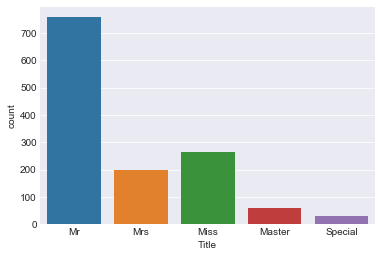

In [15]:
sns.set_style('darkgrid')
sns.countplot(x='Title', data=df)
sns.despine()

As we have missing values in our Age column, we'll try to impute Average Age values for passengers of each Passnger Class:

In [16]:
list(sorted(df['Pclass'].unique()))

[1, 2, 3]

In [17]:
print('So, we\'ve 3 unique Passenger Classes.')
for i in range(1,4):
    print('Average passenger age of class '+str(i)+': '+str(df[df['Pclass']==i]['Age'].mean()))

So, we've 3 unique Passenger Classes.
Average passenger age of class 1: 39.15992957746479
Average passenger age of class 2: 29.506704980842912
Average passenger age of class 3: 24.81636726546906


In [18]:
def imputeAge(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 39
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age

In [19]:
df['Age'] = df[['Age', 'Pclass']].apply(imputeAge, axis=1)

In [20]:
df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Has_Cabin         0
Title             0
dtype: int64

In [21]:
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [22]:
df['Categorical_age'] = pd.qcut(df['Age'], 4, labels=[1, 2, 3, 4])

In [23]:
df['Categorical_fare'] = pd.qcut(df['Fare'], 4, labels=[1, 2, 3, 4])

In [24]:
df[['Categorical_age', 'Categorical_fare']].head(10)

,Categorical_age,Categorical_fare
0,1,1
1,4,4
2,2,2
3,3,4
4,3,2
5,2,2
6,4,4
7,1,3
8,3,2
9,1,3


In [25]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,Title,Categorical_age,Categorical_fare
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,Mr,1,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs,4,4
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss,2,2
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs,3,4
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr,3,2


We'll use get_dummies function to convert categorical columns, Sex and Embarked into numeric ones.

For Sex column, we create a dummy column containing 0 and 1, where 0-female, 1-male

For Embarked column, we create two dummy columns Q and S both containing 0 and 1:

where Q=1 denotes Queenstown, S=1 denotes Southampton, Q=0 and S=0 denotes Cherbourg

In [26]:
sex = pd.get_dummies(df['Sex'], drop_first=True)

In [27]:
embark = pd.get_dummies(df['Embarked'], drop_first=True)

In [28]:
df = pd.concat([df, sex, embark], axis=1)
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,Title,Categorical_age,Categorical_fare,male,Q,S
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,Mr,1,1,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs,4,4,0,0,0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss,2,2,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs,3,4,0,0,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr,3,2,1,0,1


In [29]:
df.isnull().sum()

PassengerId            0
Pclass                 0
Name                   0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin               1014
Embarked               2
Has_Cabin              0
Title                  0
Categorical_age        0
Categorical_fare       0
male                   0
Q                      0
S                      0
dtype: int64

In [30]:
df.drop(['Cabin', 'Name', 'PassengerId', 'Ticket', 'Age', 'Fare', 'SibSp', 'Parch', 'Title', 'Sex', 'Embarked'], axis=1, inplace=True)
df.head(10)

,Pclass,Has_Cabin,Categorical_age,Categorical_fare,male,Q,S
0,3,0,1,1,1,0,1
1,1,1,4,4,0,0,0
2,3,0,2,2,0,0,1
3,1,1,3,4,0,0,1
4,3,0,3,2,1,0,1
5,3,0,2,2,1,1,0
6,1,1,4,4,1,0,1
7,3,0,1,3,1,0,1
8,3,0,3,2,0,0,1
9,2,0,1,3,0,0,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 7 columns):
Pclass              1309 non-null int64
Has_Cabin           1309 non-null int64
Categorical_age     1309 non-null category
Categorical_fare    1309 non-null category
male                1309 non-null uint8
Q                   1309 non-null uint8
S                   1309 non-null uint8
dtypes: category(2), int64(2), uint8(3)
memory usage: 77.4 KB


In [32]:
df.dropna(inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 7 columns):
Pclass              1309 non-null int64
Has_Cabin           1309 non-null int64
Categorical_age     1309 non-null category
Categorical_fare    1309 non-null category
male                1309 non-null uint8
Q                   1309 non-null uint8
S                   1309 non-null uint8
dtypes: category(2), int64(2), uint8(3)
memory usage: 37.4 KB


As we've completely cleaned our dataset, now we'll again separate our train and test data which we concatenated at the beginning. First 891 rows denote our training data, and rest of the rows were part of test data. We separate them as X_train and X_test.

In [34]:
X_train = df[0:891]
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 7 columns):
Pclass              891 non-null int64
Has_Cabin           891 non-null int64
Categorical_age     891 non-null category
Categorical_fare    891 non-null category
male                891 non-null uint8
Q                   891 non-null uint8
S                   891 non-null uint8
dtypes: category(2), int64(2), uint8(3)
memory usage: 25.6 KB


In [35]:
X_test = df[891:]
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass              418 non-null int64
Has_Cabin           418 non-null int64
Categorical_age     418 non-null category
Categorical_fare    418 non-null category
male                418 non-null uint8
Q                   418 non-null uint8
S                   418 non-null uint8
dtypes: category(2), int64(2), uint8(3)
memory usage: 12.2 KB


In [36]:
y_train = df_train['Survived']

Great! Our data is ready for our model!

# Building a Logistic Regression model


## Training and Predicting

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
log = LogisticRegression()

In [39]:
log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Testing our model on the given test set

In [40]:
predictions = log.predict(X_test)

In [41]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,